In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from price_data_generator import DataGenerator
import sys 

In [2]:
twtr_data_path = '/Users/jakubzmujdzin/Desktop/licencjat/twitter_data_with_sentiment_values_12.csv' if sys.platform == 'darwin' else 'E:/bachelor/twitter_data_with_sentiment_values_12.csv' 

In [3]:
tt = pd.read_csv(twtr_data_path)

In [4]:
tt.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,quoteCount,processed_content,label,score,neg,neu,pos,compound
0,0,2021-10-06 23:59:59+00:00,@chrisrussi @PeterLBrandt #Bitcoin makes Piece...,0,0,0,0,"['chrisrussi', 'PeterLBrandt', 'Bitcoin', 'mak...",NEGATIVE,0.996398,0.075,0.782,0.144,0.4678
1,1,2021-10-06 23:59:56+00:00,"@Bitcoin, #Bitcoin is the coin with the best r...",0,0,1,0,"['Bitcoin', 'Bitcoin', 'coin', 'best', 'riskad...",POSITIVE,0.997993,0.000,0.769,0.231,0.6369
2,2,2021-10-06 23:59:55+00:00,👉I just joined the #ASTROSWAP @ADAPADOFFICIAL ...,0,0,0,0,"['', 'I', 'joined', 'ASTROSWAP', 'ADAPADOFFICI...",NEGATIVE,0.997589,0.000,1.000,0.000,0.0000
3,3,2021-10-06 23:59:55+00:00,Best #cryptocurrency risk-adjusted returns in ...,1,0,1,0,"['Best', 'cryptocurrency', 'riskadjusted', 're...",POSITIVE,0.986571,0.000,0.811,0.189,0.6369
4,4,2021-10-06 23:59:49+00:00,Are You guys excited for the Pancake Squad lau...,1,0,1,0,"['Are', 'You', 'guy', 'excited', 'Pancake', 'S...",NEGATIVE,0.993967,0.000,0.856,0.144,0.7096


In [5]:
tt['date'] = pd.to_datetime(tt.date)

Text(0.5, 1.0, 'Number of tweets over time')

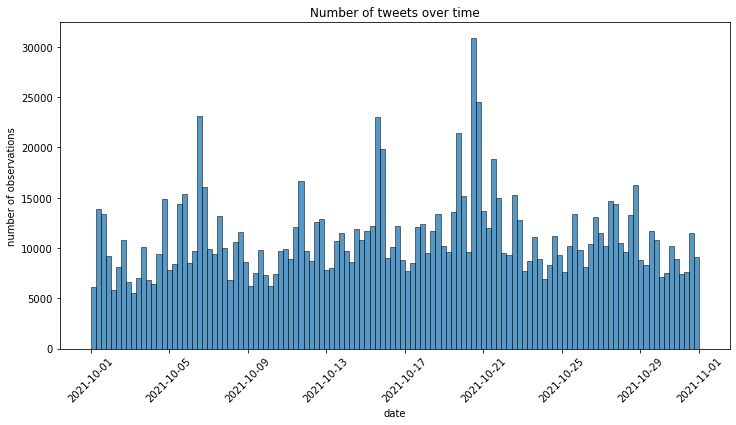

In [15]:
sns.histplot(tt.date)
plt.xticks(rotation=45)
plt.ylabel('number of observations')
plt.xlabel('date')
plt.title('Number of tweets over time')

In [7]:
p_df = DataGenerator('15m', '01/10/21', '01/11/21').data

In [8]:
p_df['open'] = pd.to_numeric(p_df['open'])
p_df['close'] = pd.to_numeric(p_df['close'])

In [9]:
p_df['volatility'] = abs(p_df['open'] - p_df['close'])/p_df['close']

In [26]:
agg_4h = p_df.groupby(pd.Grouper(key='date', freq='4h')).aggregate(np.mean)

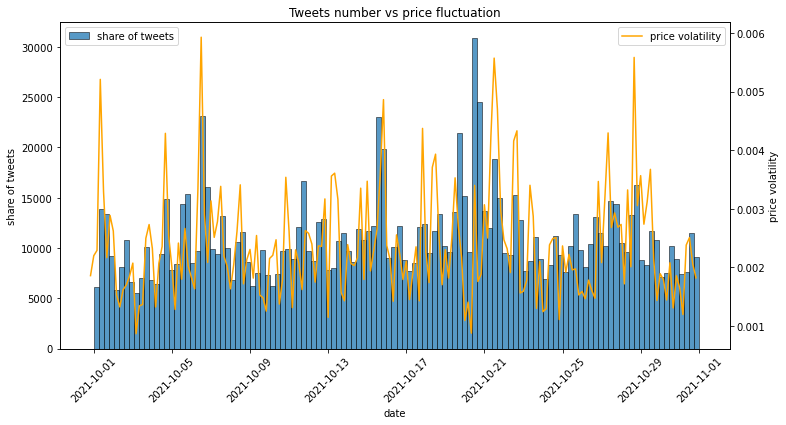

In [27]:
plt.rcParams["figure.figsize"] = (12,6)
sns.histplot(tt.date)
plt.xticks(rotation=45)
plt.ylabel('share of tweets')
plt.xlabel('date')
plt.title('Tweets number vs price fluctuation')
plt.legend(['share of tweets'], loc='upper left')
ax2 = plt.twinx()
sns.lineplot(x=agg_1d.index, y=agg_1d.volatility, ax=ax2, color='orange')
plt.ylabel('price volatility')
ax2.legend(['price volatility'], loc='upper right')

In [12]:
pd.set_option("display.precision", 6)
tt.describe()

,Unnamed: 0,replyCount,retweetCount,likeCount,quoteCount,score,neg,neu,pos,compound
count,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06,1.319133e+06
mean,6.595660e+05,1.338398e+00,1.840831e+00,8.287365e+00,1.620792e-01,9.729438e-01,3.542876e-02,8.670418e-01,9.752911e-02,1.774031e-01
std,3.808010e+05,3.412168e+01,4.854971e+01,1.186056e+02,1.016602e+01,7.189294e-02,7.928312e-02,1.415672e-01,1.251196e-01,4.007924e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000153e-01,0.000000e+00,5.100000e-02,0.000000e+00,-9.991000e-01
25%,3.297830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.872759e-01,0.000000e+00,7.720000e-01,0.000000e+00,0.000000e+00
50%,6.595660e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.948761e-01,0.000000e+00,8.920000e-01,4.600000e-02,0.000000e+00
75%,9.893490e+05,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,9.979621e-01,0.000000e+00,1.000000e+00,1.670000e-01,4.891000e-01
max,1.319132e+06,1.277700e+04,1.598200e+04,2.280900e+04,8.474000e+03,9.998879e-01,9.490000e-01,1.000000e+00,9.190000e-01,9.941000e-01


In [13]:
p_df.describe()

,open_tstmp,open,close,close_tstmp,trades,volatility
count,2.981000e+03,2981.000000,2981.000000,2.981000e+03,2981.000000,2.981000e+03
mean,1.634380e+12,57610.999037,57616.890533,1.634381e+12,16725.180476,2.377922e-03
std,7.746164e+08,5332.689475,5327.024721,7.746164e+08,13595.564710,2.522229e-03
min,1.633039e+12,43379.000000,43379.010000,1.633040e+12,4140.000000,1.608519e-07
25%,1.633710e+12,54676.300000,54679.990000,1.633711e+12,9768.000000,8.208327e-04
50%,1.634380e+12,59450.010000,59470.310000,1.634381e+12,13251.000000,1.724637e-03
75%,1.635051e+12,61593.130000,61593.130000,1.635052e+12,19043.000000,3.109056e-03
max,1.635721e+12,66875.840000,66875.830000,1.635722e+12,213194.000000,3.531446e-02
